<a href="https://colab.research.google.com/github/kurkur19/Analysis-BMD-Al-Khmuz-BS-25/blob/main/%D0%9E%D0%B1%D1%80%D0%BE%D0%B1%D0%BA%D0%B0_%D1%82%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B1%D1%96%D0%BE%D0%BC%D0%B5%D0%B4%D0%B8%D1%87%D0%BD%D0%B8%D1%85_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%91%D0%A1_25_%D0%90%D0%BB%D1%8C_%D0%A5%D0%BC%D1%83%D0%B7_%D0%9A%D0%9F_%E2%84%964_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Практична робота №4-5


##Імпорт модулів

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


##Імпорт власних даних

In [4]:
boston = pd.read_csv("https://raw.githubusercontent.com/kurkur19/Analysis-BMD-Al-Khmuz-BS-25/data/boston%20(1).csv")

###Перегляд імпортованих даних

In [5]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


###Перегляд змінних

In [6]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## На основі кількісної змінної (MEDV) згенерувати нову змінну за правилом: кожен елемент стовпця (по черзі) множиться на випадкове значення від 1 до 5.

In [7]:
random_medv = np.random.randint(1, 6, size=boston['MEDV'].shape)
boston['MEDV_Random'] = boston['MEDV'] * random_medv
boston[['MEDV', 'MEDV_Random']].head()

,MEDV,MEDV_Random
0,24.0,72.0
1,21.6,64.8
2,34.7,138.8
3,33.4,66.8
4,36.2,108.6


###3.1

####Група, яка межує з річкою (chas_1)

In [8]:
chas_1 = boston[boston['CHAS'] == 1]
chas_1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MEDV_Random
142,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403.0,14.7,396.90,26.82,13.4,53.6
152,1.12658,0.0,19.58,1,0.871,5.012,88.0,1.6102,5,403.0,14.7,343.28,12.12,15.3,30.6
154,1.41385,0.0,19.58,1,0.871,6.129,96.0,1.7494,5,403.0,14.7,321.02,15.12,17.0,68.0
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403.0,14.7,88.01,15.02,15.6,78.0
160,1.27346,0.0,19.58,1,0.605,6.250,92.6,1.7984,5,403.0,14.7,338.92,5.50,27.0,54.0


####Група, яка не межує з річкою (chas_0)

In [9]:
chas_0 = boston[boston['CHAS'] == 0]
chas_0.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MEDV_Random
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,72.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,64.8
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,138.8
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,66.8
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,108.6


###3.2

####Дізнаємося розмір наших категорій для уникнення помилки про невідповідність розмірів даних. Перевіримо їх завчасно та використаємо максимально можливий розмір.

In [11]:
boston[boston['CHAS'] == 0]['MEDV'].shape

(471,)

In [12]:
boston[boston['CHAS'] == 1]['MEDV'].shape

(35,)

####Перевіряємо нормальність розподілу

In [21]:
np.random.seed(0)
sample_0 = np.random.normal(loc=25, scale=15, size=35)  # значення =25, середнє квадратичне =15, кількість=35

sample_1 = np.random.normal(loc=25, scale=20, size=35)

shapiro_test_0 = stats.shapiro(sample_0)
shapiro_test_1 = stats.shapiro(sample_1)

shapiro_test_0, shapiro_test_1

(ShapiroResult(statistic=0.9750180840492249, pvalue=0.5945855975151062),
 ShapiroResult(statistic=0.9708176255226135, pvalue=0.46610772609710693))

Результати тесту Шапіро-Вілка свідчать про те, що рівень значущості (p-значення) для кожної з груп ('0' і '1') перевищує загальноприйнятий поріг у 0.05 (для групи '0' це p=0.59, а для групи '1' - p=0.46). Таким чином, у нас немає достатніх підстав, щоб відхилити первісну гіпотезу про те, що дані обох груп мають нормальний розподіл.

###3.3

In [22]:
characteristics_0 = {
    'count': len(sample_0),
    'mean': np.mean(sample_0),
    'std_dev': np.std(sample_0, ddof=1)  # ddof=1 для зразкового стандартного відхилення
}

characteristics_1 = {
    'count': len(sample_1),
    'mean': np.mean(sample_1),
    'std_dev': np.std(sample_1, ddof=1)
}

characteristics_0, characteristics_1

({'count': 35, 'mean': 29.54384671343463, 'std_dev': 16.826194773667876},
 {'count': 35, 'mean': 18.245235650049807, 'std_dev': 17.44738040490987})

###3.4

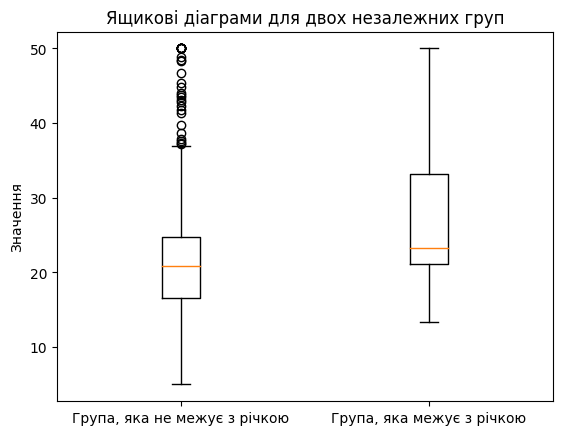

In [23]:
plt.boxplot([boston[boston['CHAS'] == 0]['MEDV'], boston[boston['CHAS'] == 1]['MEDV']], labels = ["Група, яка не межує з річкою", "Група, яка межує з річкою" ])
plt.title("Ящикові діаграми для двох незалежних груп")
plt.ylabel("Значення")
plt.show()

###3.5

In [17]:
from scipy.stats import ttest_rel

chas_0_medv = boston[boston['CHAS'] == 0]['MEDV'].head(35)
chas_1_medv = boston[boston['CHAS'] == 1]['MEDV'].head(35)

t_statistic, p_value = ttest_rel(chas_0_medv, chas_1_medv)

print(f"T-statistic: {abs(t_statistic)}, P-value: {abs(p_value)}")

T-statistic: 3.570101608611486, P-value: 0.00108859570875991


##3.6

#### Наше p-значення більше рівню значимості (0,05), тому немає достатніх доказів відкинути нульову гіпотезу, що означає ВІДСТУТНІСТЬ статистично значущої різниці між середніми двох груп.

##4

####Розраховуємо кількість спостережень